# Beam profile and uncertainties


(231,)
(231,)


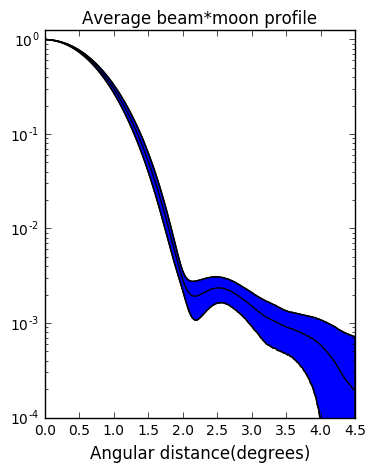

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import numpy.ma as ma
from scipy.optimize import curve_fit
from matplotlib.mlab import griddata
from scipy.interpolate import interp1d
import glob
import os,errno

############################################################
############################################################ 
##### Focal plane average beam + its 1sigma envelope #######
############################################################
############################################################ 
path_BEAM ='/Users/macbook/Dropbox/CLASS_codes/focal_plane_beam_average.txt' 
path_ERROR_BEAM ='/Users/macbook/Dropbox/CLASS_codes/focal_plane_beam_error.txt' 
         
BEAM       = np.loadtxt(path_BEAM, dtype = float)         
ERROR_BEAM = np.loadtxt(path_ERROR_BEAM, dtype = float)

print BEAM.shape 
print ERROR_BEAM.shape 

#Radial coordinate
r = np.linspace(0,4.5,231)
############################################################
############################################################ 
plt.clf()
plt.close('all') 
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex = True)

# Envelope_drawing
ax1.plot(r, BEAM + ERROR_BEAM,'k')
ax1.plot(r, BEAM - ERROR_BEAM,'k')
ax1.fill_between(r, BEAM - ERROR_BEAM, BEAM + ERROR_BEAM)

#ax1.set_ylabel('between y1 and y2')
#ax1.set_xlabel('$l$')
#plt.plot(r, BEAM + ERROR_BEAM,'k')
#plt.plot(r, BEAM - ERROR_BEAM,'k')
#plt.plot(r, BEAM,'k')

# Mean_drawing
ax1.set_title('Average beam*moon profile')
ax1.plot(r, BEAM ,'k')
plt.xlabel('Angular distance(degrees)', size= 12)

#plt.ylabel('$Beam function', size= 12)  

plt.yscale('Log')
plt.xlim([0, 4.5])
plt.ylim([10**(-4),10**0.1])

ax1.set_xticks(ticks = [0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5], minor = False)
ax1.set_yticks(ticks = [10**(-4),10**(-3),10**(-2),10**(-1),1], minor = False)

f = plt.gcf()
f.set_size_inches(4.0,5.0)
#plt.savefig("/home/bastian/plots/average_beam*moon.png", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/average_beam*moon.pdf", bbox_inches="tight")
plt.show()


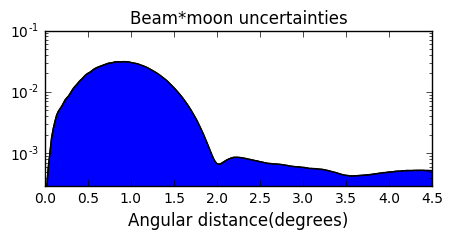

In [6]:
############################################################
############################################################
plt.clf()
plt.close('all')
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex = True)

ax1.fill_between(r, 0, ERROR_BEAM)

ax1.set_title('Beam*moon uncertainties')
plt.plot(r, ERROR_BEAM,'k')

plt.xlabel('Angular distance(degrees)', size= 12)
#plt.ylabel('$Beam function', size= 12)  

plt.yscale('Log')
plt.xlim([0, 4.5])
plt.ylim([3*10**(-4),10**(-1)])

ax1.set_xticks(ticks = [0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5], minor = False)
ax1.set_yticks(ticks = [3*10**(-4),10**(-3),10**(-2),10**(-1)], minor = False)

f = plt.gcf()
f.set_size_inches(5.0,2.0)
#plt.savefig("/home/bastian/plots/uncertainties_average_beam*moon.png", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/uncertainties_average_beam*moon.pdf", bbox_inches="tight")
plt.show()



r (231,)
BEAMS (231,)
ERROR_BEAM (231,)


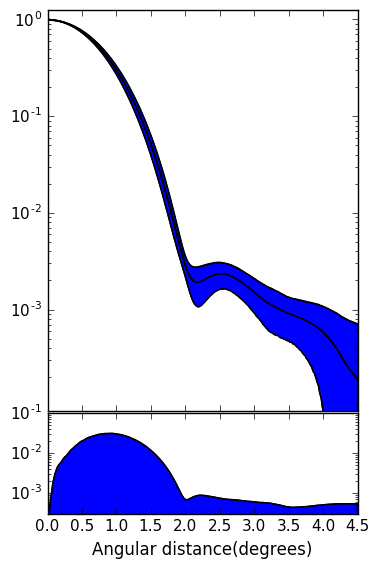

In [10]:
############################################################
############################################################   
# Double figure withut a title.
############################################################
############################################################  

plt.clf()
plt.close('all')
f = plt.figure()

fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = False, gridspec_kw ={'height_ratios':[4,1]})#, 'width_ratios':[1, 1]}  )

#ax1.set_title('Averaged Beam*Moon Uncertainties')

ax1.fill_between(r, BEAM, BEAM + ERROR_BEAM) 
ax1.plot(r, BEAM + ERROR_BEAM, 'k')
ax1.plot(r, BEAM, 'k')

print 'r', r.shape
print 'BEAMS', BEAM.shape
print 'ERROR_BEAM', ERROR_BEAM.shape

#n = 10
ax1.fill_between(r, BEAM, BEAM - ERROR_BEAM)  
ax1.plot(r, BEAM - ERROR_BEAM, 'k')


ax2.plot(r, ERROR_BEAM,'k')
ax2.fill_between(r, 0, ERROR_BEAM)

plt.xlabel('Angular distance(degrees)', size = 12)

ax1.set_yscale('Log')
ax1.set_ylim([9*10**(-5),10**(0.1)])
ax1.set_yticks(ticks = [10**(-3),10**(-2),10**(-1),10**(0.0)], minor = False)  #, size= 12)
ax2.set_yscale('Log')
ax2.set_ylim([3*(10**(-4)),10**(-1)])
ax2.set_yticks(ticks = [10**(-3),10**(-2),10**(-1)], minor = False)

plt.xlim([0, 4.5])

ax1.tick_params(axis ='y', labelsize = 11)
ax1.tick_params(axis ='x', labelsize = 11)

ax2.tick_params(axis ='y', labelsize = 11)
ax2.tick_params(axis ='x', labelsize = 11)

ax2.set_xticks(ticks = [0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5] , minor = False)
#ax2.set_xticklabels(labels, fontdict=None, minor=False, **kwargs)

#ax2.xticks(fontsize=14)#, rotation=90)

f = plt.gcf()
f.subplots_adjust(hspace = 0.01)
f.set_size_inches(4.0,6.5)
#plt.savefig("/home/bastian/plots/average_beam*moon+uncertainty_wt.png", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/average_beam*moon+uncertainty_wt.pdf", bbox_inches="tight")
plt.show()

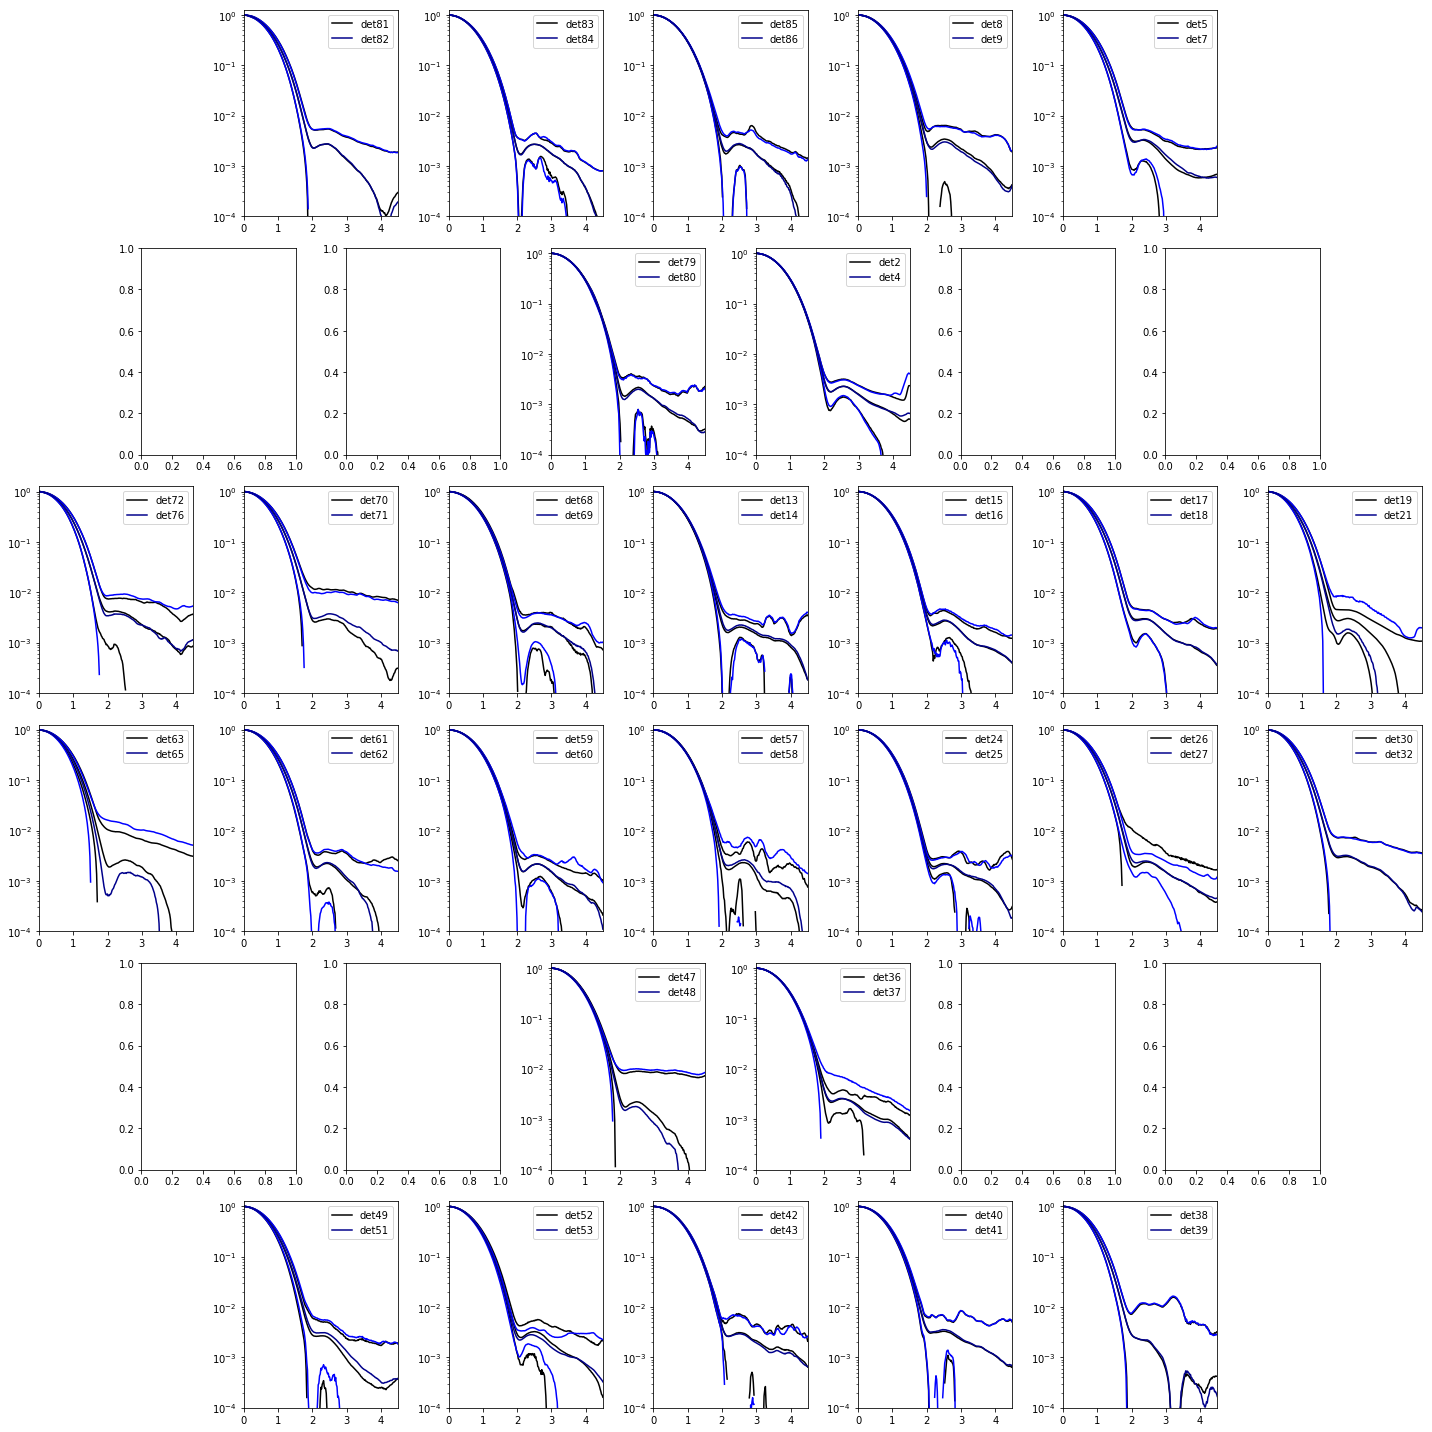

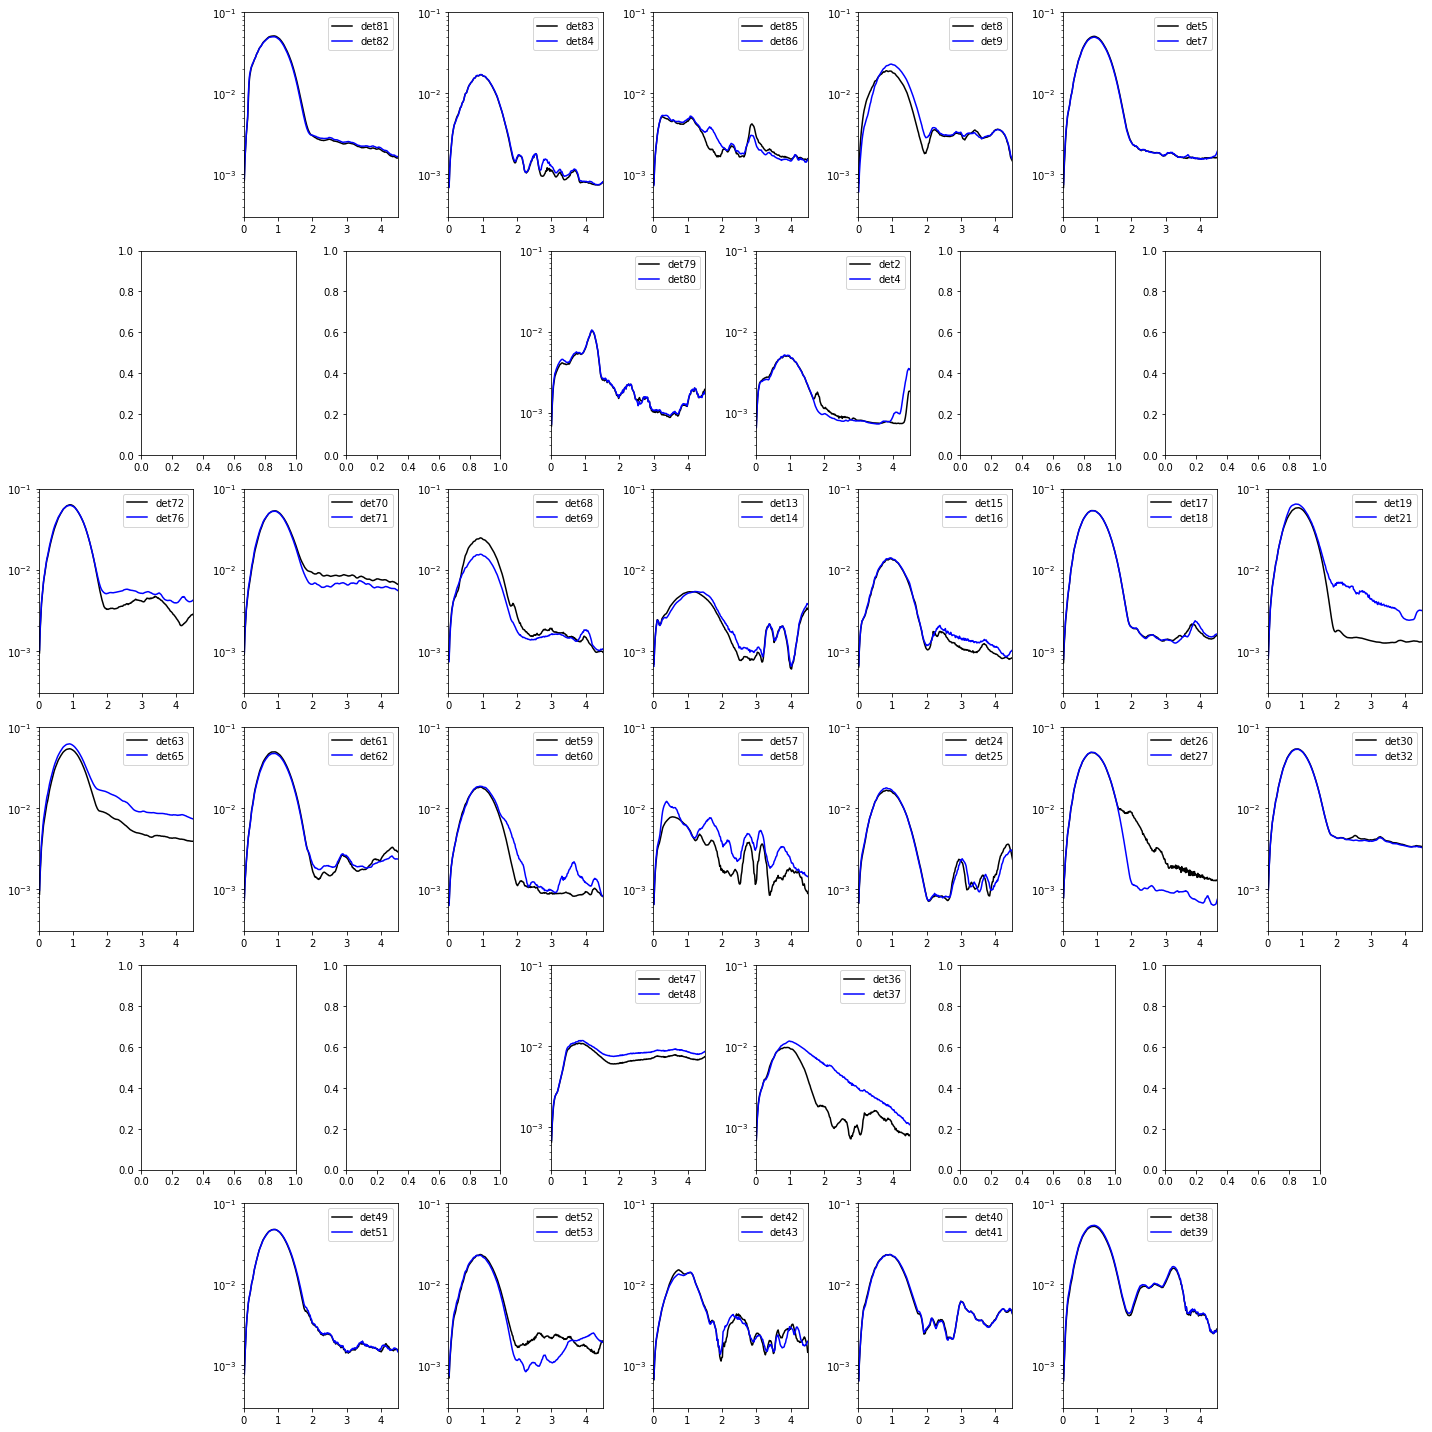

In [119]:
import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.mlab import griddata

from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

import glob
import os,errno
import itertools
################################################################################################
################################################################################################
def fill_beam_array(B_array, path_B, d = 0):  
    # Load the list of selected beams profiles
    # TO DO: what about if some of them are empty ???
    goodscans = np.loadtxt(path_B, dtype = str, ndmin = 1)
    # Empty profile 
    # B = np.zeros((231,), dtype = float)
    r = np.linspace(0, 4.5, num = 231, endpoint = True)
    for i in range(0, len(goodscans)):     
        r_split     = goodscans[i].split('-')
        if d < 10:
            radius_name = '/home/bastian/radial_profiles/'+ 'Det' + '0'+ str(d) +'/radial_coordinate' + '-' + r_split[1] +'-'+ r_split[2] + '-' + r_split[3] + '-' + r_split[4] + '-' + r_split[5]
        else:     
            radius_name = '/home/bastian/radial_profiles/'+ 'Det' + str(d) +'/radial_coordinate' + '-' + r_split[1] +'-'+ r_split[2] + '-' + r_split[3] + '-' + r_split[4] + '-' + r_split[5]
        
        beam     = np.loadtxt(goodscans[i], dtype = float)
        radius   = np.loadtxt(radius_name, dtype = float)
        
        beam     = beam[:len(beam)-1]
        radius   = radius[:len(radius)-1]
        # interpolate the beam into 231 array.
        interpol = interp1d(radius, beam, kind = 'cubic')
        b        = interpol(r)
        b        = b.reshape([1, 231])   
        B_array  = np.append(B_array, b)   
    return B_array
################################################################################################
################################################################################################
def beam_matrix(det):
    for d in range(0, len(det)):
        BEAMS = np.array([])  
        N = 0 
        for y in range(2016, 2017 + 1):
            if y == 2016:
                 for m in range(6, 12 + 1):
                        if m < 10:
                            if det[d] < 10:     
                                folder_path      = '/home/bastian/radial_profiles/' +'Det' + '0' + str(det[d]) + '/'   
                                path_B           = folder_path + 'classified_scans_' + str(y) + '_'+ '0' + str(m) +'.txt' 
                                N                = N + np.loadtxt(path_B, dtype = str, ndmin = 1).shape[0]
                                #print N
                                BEAMS            = fill_beam_array(BEAMS, path_B, det[d])
                            else:
                                folder_path      = '/home/bastian/radial_profiles/' +'Det'  + str(det[d]) + '/'   
                                path_B           = folder_path + 'classified_scans_' + str(y) + '_'+ '0' + str(m) +'.txt' 
                                N                = N + np.loadtxt(path_B, dtype = str, ndmin = 1).shape[0]
                                #print N
                                BEAMS            = fill_beam_array(BEAMS, path_B, det[d])     
                        else:    
                            if det[d] < 10:     
                                folder_path      = '/home/bastian/radial_profiles/' +'Det' + '0' + str(det[d]) + '/'   
                                path_B           = folder_path + 'classified_scans_' + str(y) + '_'+ str(m) +'.txt'     
                                N                = N + np.loadtxt(path_B, dtype = str, ndmin = 1).shape[0]
                                #print N
                                BEAMS            = fill_beam_array(BEAMS, path_B, det[d])
                            else:
                                folder_path      = '/home/bastian/radial_profiles/' +'Det' + str(det[d]) + '/'   
                                path_B           = folder_path + 'classified_scans_' + str(y) + '_'+ str(m) +'.txt' 
                                N                = N + np.loadtxt(path_B, dtype = str, ndmin = 1).shape[0]
                                #print N
                                BEAMS            = fill_beam_array(BEAMS, path_B, det[d])
                                
            else :    
                 for m in range(1, 9 + 1):
                        if m < 10:
                            if det[d] < 10:     
                                folder_path      = '/home/bastian/radial_profiles/' +'Det' + '0' + str(det[d]) + '/'   
                                path_B           = folder_path + 'classified_scans_' + str(y) + '_'+ '0' + str(m) +'.txt' 
                                N                = N + np.loadtxt(path_B, dtype = str, ndmin = 1).shape[0]
                                #print N
                                BEAMS            = fill_beam_array(BEAMS, path_B, det[d])
                            else:
                                folder_path      = '/home/bastian/radial_profiles/' +'Det'  + str(det[d]) + '/'   
                                path_B           = folder_path + 'classified_scans_' + str(y) + '_'+ '0' + str(m) +'.txt' 
                                N                = N + np.loadtxt(path_B, dtype = str, ndmin = 1).shape[0]
                                #print N
                                BEAMS            = fill_beam_array(BEAMS, path_B, det[d])      
                        else:    
                            if det[d] < 10:     
                                folder_path      = '/home/bastian/radial_profiles/' +'Det' + '0' + str(det[d]) + '/'   
                                path_B           = folder_path + 'classified_scans_' + str(y) + '_'+ str(m) +'.txt'     
                                N                = N + np.loadtxt(path_B, dtype = str, ndmin = 1).shape[0]
                                #print N
                                BEAMS            = fill_beam_array(BEAMS, path_B, det[d])
                            else:
                                folder_path      = '/home/bastian/radial_profiles/' +'Det' + str(det[d]) + '/'   
                                path_B           = folder_path + 'classified_scans_' + str(y) + '_' + str(m) +'.txt' 
                                N                = N + np.loadtxt(path_B, dtype = str, ndmin = 1).shape[0]
                                #print N
                                BEAMS            = fill_beam_array(BEAMS, path_B, det[d])
                                                 
        BEAMS = BEAMS.reshape([N, 231])    
        #print BEAMS.shape                      
        if d < 10:
            BEAMS_name = '/home/bastian/radial_profiles/' + 'Beams_det_'+'0'+ str(det[d]) + '.txt' 
        else:
            BEAMS_name = '/home/bastian/radial_profiles/' + 'Beams_det_'+ str(det[d]) + '.txt' 
        np.savetxt(BEAMS_name, BEAMS, fmt = '%s')  
        #print BEAMS
################################################################################################
################################################################################################
def beam_average_std(det):
    if det < 10:     
        folder_path      = '/home/bastian/radial_profiles/' 
        path_B           = folder_path + 'Beams_det_' + '0' + str(det) + '.txt'
    else:
        folder_path      = '/home/bastian/radial_profiles/' 
        path_B           = folder_path + 'Beams_det_' + str(det) + '.txt'
    BEAMS     = np.loadtxt(path_B, dtype = float)
    beam_ave  = 0
    for b in range(0, BEAMS.shape[0]):
        #print b
        beam_ave = beam_ave + BEAMS[b]
        
    beam_ave     = beam_ave/BEAMS.shape[0] 
    
    DEV2            = np.zeros((BEAMS.shape[0], 231), dtype = float)
    SIGMA_2_BEAM    = np.zeros(231, dtype = float)
    for d in range(0, BEAMS.shape[0]):
        DEV2[d,:]   = (BEAMS[d,:] - beam_ave)**2.0
    #Add the same point add for each detector 
    for r in range(0,231):
        for d in range(0, BEAMS.shape[0]):
            SIGMA_2_BEAM[r] = SIGMA_2_BEAM[r] + (DEV2[d,r])/BEAMS.shape[0]
  
    SIGMA_2_BEAM = SIGMA_2_BEAM**(0.5)
    
    return beam_ave, SIGMA_2_BEAM
################################################################################################
################################################################################################
def printdet(det):    
    r          = np.linspace(0,4.5,231)
    beam       = beam_average_std(det)[0]
    ERROR_BEAM = beam_average_std(det)[1]
    
    plt.clf()
    plt.close('all') 
    f = plt.figure()
    fig, (ax1) = plt.subplots(1, 1, sharex = True)
    ax1.plot(r, beam + ERROR_BEAM, 'k')
    ax1.plot(r, beam - ERROR_BEAM, 'k')
    #ax1.fill_between(r, beam - ERROR_BEAM, beam + ERROR_BEAM)
    #ax1.set_ylabel('between y1 and y2')
    #ax1.set_xlabel('$l$')
    
    if det < 10:
        plot_name = 'Average beam*moon profile det_' + '0' + str(det)
    else:    
        plot_name = 'Average beam*moon profile det_' + str(det)
    
    ax1.set_title(plot_name)
    ax1.plot(r, beam,'k')

    #plt.plot(r, BEAMS[0,:] + ERROR_BEAM,'k')
    #plt.plot(r, BEAMS[0,:] - ERROR_BEAM,'k')
    #plt.plot(r, BEAMS[0,:],'k')

    plt.xlabel('Angular distance(degrees)', size= 12)
    #plt.ylabel('$Beam function', size= 12)  

    plt.yscale('Log')
    plt.xlim([0, 4.5])
    plt.ylim([10**(-4),10**0.1])

    ax1.set_xticks(ticks = [0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5], minor = False)
    ax1.set_yticks(ticks = [10**(-4),10**(-3),10**(-2),10**(-1),1], minor = False)

    f = plt.gcf()
    f.set_size_inches(4.0,5.0)
    #plt.savefig("/home/bastian/plots/average_beam*moon.png", bbox_inches="tight")
    #plt.savefig("/home/bastian/plots/average_beam*moon.pdf", bbox_inches="tight")
    plt.show()    
################################################################################################
################################################################################################
def axis_plot_1(ax, det):
    r          = np.linspace(0, 4.5, 231)
    beam       = beam_average_std(det)[0]
    ERROR_BEAM = beam_average_std(det)[1]
    ax.plot(r, beam + ERROR_BEAM, 'k')
    ax.plot(r, beam - ERROR_BEAM, 'k')
    #if det < 10:
    #        plot_name = 'Average beam*moon profile det_' + '0' + str(det)
    #else:    
    #        plot_name = 'Average beam*moon profile det_' + str(det)
    ax.plot(r, beam,'k', label='det' + str(det))
    ax.set_yscale('Log')
    ax.set_xlim([0, 4.5])
    ax.set_ylim([10**(-4), 10**0.1])

    ax.set_xticks(ticks = [0, 1.0, 2.0, 3.0, 4.0], minor = False)
    ax.set_yticks(ticks = [10**(-4), 10**(-3), 10**(-2), 10**(-1), 1], minor = False)

    f = plt.gcf()
    
    f.set_size_inches(20.0, 20.0)
    
    ax.legend(loc = 1)
################################################################################################
################################################################################################
def axis_plot_2(ax, det):
    r          = np.linspace(0, 4.5, 231)
    beam       = beam_average_std(det)[0]
    ERROR_BEAM = beam_average_std(det)[1]
    ax.plot(r, beam + ERROR_BEAM, 'blue')
    ax.plot(r, beam - ERROR_BEAM, 'blue')
    #if det < 10:
    #        plot_name = 'Average beam*moon profile det_' + '0' + str(det)
    #else:    
    #        plot_name = 'Average beam*moon profile det_' + str(det)
    ax.plot(r, beam,'darkblue', label='det' + str(det))
    ax.set_yscale('Log')
    ax.set_xlim([0, 4.5])
    ax.set_ylim([10**(-4), 10**0.1])

    ax.set_xticks(ticks = [0, 1.0, 2.0, 3.0, 4.0], minor = False)
    ax.set_yticks(ticks = [10**(-4), 10**(-3), 10**(-2), 10**(-1), 1], minor = False)

    f = plt.gcf()
    
    f.set_size_inches(20.0, 20.0)
    
    ax.legend(loc = 1)
    
################################################################################################
################################################################################################
def axis_plot_1_dev(ax, det):
    r          = np.linspace(0, 4.5, 231)
    ERROR_BEAM = beam_average_std(det)[1]
    ax.plot(r, ERROR_BEAM, 'black', label = 'det'+ str(det))
    
    ax.set_yscale('Log')
    
    ax.set_xlim([0, 4.5])
    ax.set_ylim([3*(10**(-4)),10**(-1)])
    
    ax.set_xticks(ticks = [0, 1.0, 2.0, 3.0, 4.0], minor = False)
    ax.set_yticks(ticks = [10**(-3),10**(-2),10**(-1)], minor = False)
    
    f = plt.gcf()
    f.set_size_inches(20.0, 20.0)
    ax.legend(loc = 1)  
    
    
def axis_plot_2_dev(ax, det):
    r          = np.linspace(0, 4.5, 231)
    ERROR_BEAM = beam_average_std(det)[1]
    ax.plot(r, ERROR_BEAM, 'blue', label = 'det'+ str(det))
    
    ax.set_yscale('Log')
    
    ax.set_xlim([0, 4.5])
    ax.set_ylim([3*(10**(-4)),10**(-1)])
    
    ax.set_xticks(ticks = [0, 1.0, 2.0, 3.0, 4.0], minor = False)
    ax.set_yticks(ticks = [10**(-3),10**(-2),10**(-1)], minor = False)
    
    f = plt.gcf()
    f.set_size_inches(20.0, 20.0)
    ax.legend(loc = 1)      
    
# def uncertainties(ax,det):  
################################################################################################
################################################################################################    
# det        = np.array([0,2,4,5,7,8,9,11,13,14,15,16,17,18,19,21,22,24,25,26,27,30,32,35,36,37,38,39,40,41,42,43,46,47,48,49,51,52,53,55,57,58,59,60,61,62,63,65,66,68,69,70,71,72,76,77,79,80,81,82,83,84,85,86])
# print BEAMS_a.shape
# print len(det)

#det3 = np.array([13,14])
#beam_matrix(det3)

#for i in range(0,len(det3)):
#    printdet(det3[i])
   

#print beam_average_std(0)[0]
#print beam_average_std(0)[1] 
       
#det        = np.array([0,2,4,5,7,8,9,11,13,14,15,16,17,18,19,21,22,24,25,26,27,30,32,35,36,37,38,39,40,41,42,43,46,47,48,49,51,52,53,55,57,58,59,60,61,62,63,65,66,68,69,70,71,72,76,77,79,80,81,82,83,84,85,86])
#beam_matrix(det)

#det1 = np.array([0,2,4,5,7,8,9])
#det2 = np.array([15,16,17,18,19,21,22,24,25,26,27,30,32,35,36,37,38,39,40,41,42,43,46,47,48,49,51,52,53,55,57,58,59,60,61,62,63,65,66,68,69,70,71,72,76,77,79,80,81,82,83,84,85,86])

################################################################################################
################################################################################################   
#                                       Focal plane Plot
################################################################################################
################################################################################################
fig = plt.figure()

gs1 = gridspec.GridSpec(12, 14)
plt.subplots_adjust(left = 0.05, right = 0.95, top = 0.95, bottom = 0.05)

# Create the axis
ax1 = fig.add_subplot(gs1[0:2,2:4])
ax2 = fig.add_subplot(gs1[0:2,4:6])
ax3 = fig.add_subplot(gs1[0:2,6:8])
ax4 = fig.add_subplot(gs1[0:2,8:10])
ax5 = fig.add_subplot(gs1[0:2,10:12])

ax6   = fig.add_subplot(gs1[2:4,1:3])
ax7   = fig.add_subplot(gs1[2:4,3:5])
ax8   = fig.add_subplot(gs1[2:4,5:7])
ax9   = fig.add_subplot(gs1[2:4,7:9])
ax10  = fig.add_subplot(gs1[2:4,9:11])
ax11  = fig.add_subplot(gs1[2:4,11:13])

ax12   = fig.add_subplot(gs1[4:6,0:2])
ax13   = fig.add_subplot(gs1[4:6,2:4])
ax14   = fig.add_subplot(gs1[4:6,4:6])
ax15   = fig.add_subplot(gs1[4:6,6:8])
ax16   = fig.add_subplot(gs1[4:6,8:10])
ax17   = fig.add_subplot(gs1[4:6,10:12])
ax18   = fig.add_subplot(gs1[4:6,12:14])

ax19   = fig.add_subplot(gs1[6:8,0:2])
ax20   = fig.add_subplot(gs1[6:8,2:4])
ax21   = fig.add_subplot(gs1[6:8,4:6])
ax22   = fig.add_subplot(gs1[6:8,6:8])
ax23   = fig.add_subplot(gs1[6:8,8:10])
ax24   = fig.add_subplot(gs1[6:8,10:12])
ax25   = fig.add_subplot(gs1[6:8,12:14])

ax26   = fig.add_subplot(gs1[8:10,1:3])
ax27   = fig.add_subplot(gs1[8:10,3:5])
ax28   = fig.add_subplot(gs1[8:10,5:7])
ax29   = fig.add_subplot(gs1[8:10,7:9])
ax30   = fig.add_subplot(gs1[8:10,9:11])
ax31   = fig.add_subplot(gs1[8:10,11:13])

ax32 = fig.add_subplot(gs1[10:12,2:4])
ax33 = fig.add_subplot(gs1[10:12,4:6])
ax34 = fig.add_subplot(gs1[10:12,6:8])
ax35 = fig.add_subplot(gs1[10:12,8:10])
ax36 = fig.add_subplot(gs1[10:12,10:12])

# Fill with the beams plot

axis_plot_1(ax1,81),axis_plot_2(ax1,82)
axis_plot_1(ax2,83),axis_plot_2(ax2,84)
axis_plot_1(ax3,85),axis_plot_2(ax3,86)
axis_plot_1(ax4,8), axis_plot_2(ax4,9)
axis_plot_1(ax5,5), axis_plot_2(ax5,7)

#axis_plot(ax6,-), axis_plot(ax7,-)
#axis_plot(ax7,-), axis_plot(ax7,-)
axis_plot_1(ax8,79), axis_plot_2(ax8,80)
axis_plot_1(ax9,2), axis_plot_2(ax9,4)
#axis_plot(ax10,-), axis_plot(ax10,-)
#axis_plot(ax11,-), axis_plot(ax11,-)

axis_plot_1(ax12,72),axis_plot_2(ax12,76)
axis_plot_1(ax13,70),axis_plot_2(ax13,71)
axis_plot_1(ax14,68),axis_plot_2(ax14,69)
axis_plot_1(ax15,13), axis_plot_2(ax15,14)
axis_plot_1(ax16,15), axis_plot_2(ax16,16)
axis_plot_1(ax17,17), axis_plot_2(ax17,18)
axis_plot_1(ax18,19), axis_plot_2(ax18,21)

axis_plot_1(ax19,63),axis_plot_2(ax19,65)
axis_plot_1(ax20,61),axis_plot_2(ax20,62)
axis_plot_1(ax21,59),axis_plot_2(ax21,60)
axis_plot_1(ax22,57), axis_plot_2(ax22,58)
axis_plot_1(ax23,24), axis_plot_2(ax23,25)
axis_plot_1(ax24,26), axis_plot_2(ax24,27)
axis_plot_1(ax25,30), axis_plot_2(ax25,32)

#axis_plot(ax26,-), axis_plot(ax26,-)
#axis_plot(ax27,-), axis_plot(ax27,-)
axis_plot_1(ax28,47), axis_plot_2(ax28,48)
axis_plot_1(ax29,36), axis_plot_2(ax29,37)
#axis_plot(ax30,-), axis_plot(ax30,-)
#axis_plot(ax31,-), axis_plot(ax31,-)

axis_plot_1(ax32,49),axis_plot_2(ax32,51)
axis_plot_1(ax33,52),axis_plot_2(ax33,53)
axis_plot_1(ax34,42),axis_plot_2(ax34,43)
axis_plot_1(ax35,40), axis_plot_2(ax35,41)
axis_plot_1(ax36,38), axis_plot_2(ax36,39)


plt.tight_layout()
plt.savefig("/home/bastian/plots/focal_plane_beams.png", bbox_inches="tight")
plt.savefig("/home/bastian/plots/focal_plane_beams.pdf", bbox_inches="tight")
plt.show()

################################################################################################
################################################################################################   
#                                       Focal plane Plot
################################################################################################
################################################################################################

fig = plt.figure()

gs1 = gridspec.GridSpec(12, 14)
plt.subplots_adjust(left = 0.05, right = 0.95, top = 0.95, bottom = 0.05)

# Create the axis
ax1 = fig.add_subplot(gs1[0:2,2:4])
ax2 = fig.add_subplot(gs1[0:2,4:6])
ax3 = fig.add_subplot(gs1[0:2,6:8])
ax4 = fig.add_subplot(gs1[0:2,8:10])
ax5 = fig.add_subplot(gs1[0:2,10:12])

ax6   = fig.add_subplot(gs1[2:4,1:3])
ax7   = fig.add_subplot(gs1[2:4,3:5])
ax8   = fig.add_subplot(gs1[2:4,5:7])
ax9   = fig.add_subplot(gs1[2:4,7:9])
ax10  = fig.add_subplot(gs1[2:4,9:11])
ax11  = fig.add_subplot(gs1[2:4,11:13])

ax12   = fig.add_subplot(gs1[4:6,0:2])
ax13   = fig.add_subplot(gs1[4:6,2:4])
ax14   = fig.add_subplot(gs1[4:6,4:6])
ax15   = fig.add_subplot(gs1[4:6,6:8])
ax16   = fig.add_subplot(gs1[4:6,8:10])
ax17   = fig.add_subplot(gs1[4:6,10:12])
ax18   = fig.add_subplot(gs1[4:6,12:14])

ax19   = fig.add_subplot(gs1[6:8,0:2])
ax20   = fig.add_subplot(gs1[6:8,2:4])
ax21   = fig.add_subplot(gs1[6:8,4:6])
ax22   = fig.add_subplot(gs1[6:8,6:8])
ax23   = fig.add_subplot(gs1[6:8,8:10])
ax24   = fig.add_subplot(gs1[6:8,10:12])
ax25   = fig.add_subplot(gs1[6:8,12:14])

ax26   = fig.add_subplot(gs1[8:10,1:3])
ax27   = fig.add_subplot(gs1[8:10,3:5])
ax28   = fig.add_subplot(gs1[8:10,5:7])
ax29   = fig.add_subplot(gs1[8:10,7:9])
ax30   = fig.add_subplot(gs1[8:10,9:11])
ax31   = fig.add_subplot(gs1[8:10,11:13])

ax32 = fig.add_subplot(gs1[10:12,2:4])
ax33 = fig.add_subplot(gs1[10:12,4:6])
ax34 = fig.add_subplot(gs1[10:12,6:8])
ax35 = fig.add_subplot(gs1[10:12,8:10])
ax36 = fig.add_subplot(gs1[10:12,10:12])

# Fill with the beams plot
axis_plot_1_dev(ax1,81),axis_plot_2_dev(ax1,82)
axis_plot_1_dev(ax2,83),axis_plot_2_dev(ax2,84)
axis_plot_1_dev(ax3,85),axis_plot_2_dev(ax3,86)
axis_plot_1_dev(ax4,8), axis_plot_2_dev(ax4,9)
axis_plot_1_dev(ax5,5), axis_plot_2_dev(ax5,7)

#axis_plot(ax6,-), axis_plot(ax7,-)
#axis_plot(ax7,-), axis_plot(ax7,-)
axis_plot_1_dev(ax8,79), axis_plot_2_dev(ax8,80)
axis_plot_1_dev(ax9,2), axis_plot_2_dev(ax9,4)
#axis_plot(ax10,-), axis_plot(ax10,-)
#axis_plot(ax11,-), axis_plot(ax11,-)

axis_plot_1_dev(ax12,72),axis_plot_2_dev(ax12,76)
axis_plot_1_dev(ax13,70),axis_plot_2_dev(ax13,71)
axis_plot_1_dev(ax14,68),axis_plot_2_dev(ax14,69)
axis_plot_1_dev(ax15,13), axis_plot_2_dev(ax15,14)
axis_plot_1_dev(ax16,15), axis_plot_2_dev(ax16,16)
axis_plot_1_dev(ax17,17), axis_plot_2_dev(ax17,18)
axis_plot_1_dev(ax18,19), axis_plot_2_dev(ax18,21)

axis_plot_1_dev(ax19,63),axis_plot_2_dev(ax19,65)
axis_plot_1_dev(ax20,61),axis_plot_2_dev(ax20,62)
axis_plot_1_dev(ax21,59),axis_plot_2_dev(ax21,60)
axis_plot_1_dev(ax22,57), axis_plot_2_dev(ax22,58)
axis_plot_1_dev(ax23,24), axis_plot_2_dev(ax23,25)
axis_plot_1_dev(ax24,26), axis_plot_2_dev(ax24,27)
axis_plot_1_dev(ax25,30), axis_plot_2_dev(ax25,32)

#axis_plot(ax26,-), axis_plot(ax26,-)
#axis_plot(ax27,-), axis_plot(ax27,-)
axis_plot_1_dev(ax28,47), axis_plot_2_dev(ax28,48)
axis_plot_1_dev(ax29,36), axis_plot_2_dev(ax29,37)
#axis_plot(ax30,-), axis_plot(ax30,-)
#axis_plot(ax31,-), axis_plot(ax31,-)

axis_plot_1_dev(ax32,49),axis_plot_2_dev(ax32,51)
axis_plot_1_dev(ax33,52),axis_plot_2_dev(ax33,53)
axis_plot_1_dev(ax34,42),axis_plot_2_dev(ax34,43)
axis_plot_1_dev(ax35,40),axis_plot_2_dev(ax35,41)
axis_plot_1_dev(ax36,38),axis_plot_2_dev(ax36,39)


plt.tight_layout()
plt.savefig("/home/bastian/plots/focal_plane_beams_uncertainties.png", bbox_inches="tight")
plt.savefig("/home/bastian/plots/focal_plane_beams_uncertainties.pdf", bbox_inches="tight")
plt.show()


#83-84 85-86 8-9
#   79-80 2-4
# 68-69 13-14 15-16
#59-60 57-58 24-25
#52-53  42-43 40-41

#noise criteria

#we can neglect uncertainty < 2 + low noise detector
#well behaved detector there are some of them with low noise level 2-4 

###

(5343, 231)
[  1.00000000e+00   9.97843249e-01   9.94879656e-01   9.91925971e-01
   9.88548655e-01   9.84055704e-01   9.79138068e-01   9.73696194e-01
   9.67042042e-01   9.59873490e-01   9.52166873e-01   9.43873934e-01
   9.34862050e-01   9.24439477e-01   9.13404871e-01   9.02206460e-01
   8.90465002e-01   8.77952233e-01   8.64358220e-01   8.50308959e-01
   8.36376351e-01   8.21413215e-01   8.05868046e-01   7.90485796e-01
   7.74663651e-01   7.58025510e-01   7.40525673e-01   7.23011548e-01
   7.06057051e-01   6.88707165e-01   6.70755287e-01   6.52482909e-01
   6.33911789e-01   6.15576669e-01   5.97079396e-01   5.78467474e-01
   5.60271054e-01   5.42097491e-01   5.23725578e-01   5.04933240e-01
   4.86642610e-01   4.69040233e-01   4.51120924e-01   4.33180846e-01
   4.15349517e-01   3.97989216e-01   3.81394046e-01   3.64933918e-01
   3.48578524e-01   3.32418590e-01   3.16638085e-01   3.00950065e-01
   2.85828689e-01   2.71546896e-01   2.57578502e-01   2.44002269e-01
   2.30466856e-01   2.

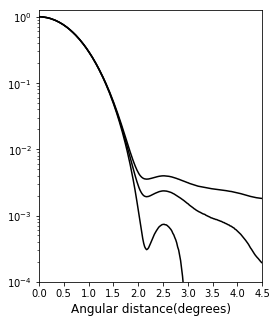

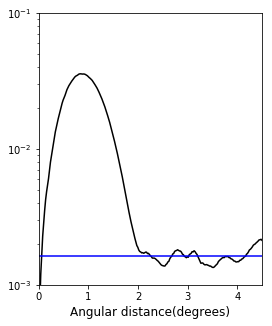

In [143]:
# Criteria center + Noise  
det = np.array([2,4,13,14,15,16,17,18,24,25,27,36,57,58,59,60,61,62,68,69,79,80])

def selected_det(det):
    # append a make a big array and finally reshape it.
    # print BEAMS.shape 
    B_array = np.array([])
    N = 0
    for d in range(0, len(det)):
        if det[d] < 10:
            BEAMS_name = '/home/bastian/radial_profiles/' + 'Beams_det_' +'0'+ str(det[d]) + '.txt' 
        else:
            BEAMS_name = '/home/bastian/radial_profiles/' + 'Beams_det_' + str(det[d]) + '.txt' 
        
        BEAM     = np.loadtxt(BEAMS_name, dtype = float)  
        N        = N + BEAM.shape[0]
        B_array  = np.append(B_array, BEAM)  
    
    B_array      = B_array.reshape([N, 231])  
    print B_array.shape
    s_beam_name  = '/home/bastian/radial_profiles/' + 'selected_beams' + '.txt'
    np.savetxt(s_beam_name, B_array, fmt = '%s') 
    
 
####

selected_det(det)

#############################################
#############################################
s_beam_name  = '/home/bastian/radial_profiles/' + 'selected_beams' + '.txt'    
BEAMS        = np.loadtxt(s_beam_name, dtype = float)
beam_ave  = 0
for b in range(0, BEAMS.shape[0]):
    beam_ave = beam_ave + BEAMS[b]  
beam_ave     = beam_ave/BEAMS.shape[0] 
    
DEV2            = np.zeros((BEAMS.shape[0], 231), dtype = float)
SIGMA_2_BEAM    = np.zeros(231, dtype = float)
for d in range(0, BEAMS.shape[0]):
    DEV2[d,:]   = (BEAMS[d,:] - beam_ave)**2.0
#Add the same point add for each detector 
for r in range(0,231):
    for d in range(0, BEAMS.shape[0]):
        SIGMA_2_BEAM[r] = SIGMA_2_BEAM[r] + (DEV2[d,r])/BEAMS.shape[0]
  
SIGMA_2_BEAM = SIGMA_2_BEAM**(0.5)
    
print beam_ave
print SIGMA_2_BEAM


#############################################
#############################################
#############################################
#############################################

r          = np.linspace(0,4.5,231)
beam       = beam_ave
ERROR_BEAM = SIGMA_2_BEAM
    
   
for i in range(0, len(r)):
    if r[i] > 2.1:
        sigma = np.average(SIGMA_2_BEAM[i:])
        break    
              


Sigma = np.full((231,), sigma)
    
print Sigma    
    
   
np.savetxt('focal_plane_beam_average.txt', beam, fmt = '%s') 
np.savetxt('focal_plane_beam_error.txt ', ERROR_BEAM, fmt = '%s') 
np.savetxt('focal_plane_ave_error.txt ', Sigma , fmt = '%s') 
    
    
plt.clf()
plt.close('all') 
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex = True)
ax1.plot(r, beam + Sigma, 'k')
ax1.plot(r, beam - Sigma, 'k')
#ax1.fill_between(r, beam - ERROR_BEAM, beam + ERROR_BEAM)
#ax1.set_ylabel('between y1 and y2')
#ax1.set_xlabel('$l$')
    
#if det < 10:
#    plot_name = 'Average beam*moon profile det_' + '0' + str(det)
#else:    
#    plot_name = 'Average beam*moon profile det_' + str(det)
    
#ax1.set_title(plot_name)
ax1.plot(r, beam,'k')

#plt.plot(r, BEAMS[0,:] + ERROR_BEAM,'k')
#plt.plot(r, BEAMS[0,:] - ERROR_BEAM,'k')
#plt.plot(r, BEAMS[0,:],'k')

plt.xlabel('Angular distance(degrees)', size= 12)
#plt.ylabel('$Beam function', size= 12)  

plt.yscale('Log')
plt.xlim([0, 4.5])
plt.ylim([10**(-4),10**0.1])

ax1.set_xticks(ticks = [0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5], minor = False)
ax1.set_yticks(ticks = [10**(-4),10**(-3),10**(-2),10**(-1),1], minor = False)

f = plt.gcf()
f.set_size_inches(4.0,5.0)
#plt.savefig("/home/bastian/plots/average_beam*moon.png", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/average_beam*moon.pdf", bbox_inches="tight")
plt.show()    

########################################################
########################################################
    
plt.clf()
plt.close('all') 
f = plt.figure()
fig, (ax1) = plt.subplots(1, 1, sharex = True)
ax1.plot(r, ERROR_BEAM, 'k')
ax1.plot(r, Sigma, 'blue')

plt.xlabel('Angular distance(degrees)', size= 12)
#plt.ylabel('$Beam function', size= 12)  

plt.yscale('Log')
plt.xlim([0, 4.5])
plt.ylim([10**(-3),10**(-1)])

#ax1.set_xticks(ticks = [0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5], minor = False)
#ax1.set_yticks(ticks = [10**(-4),10**(-3),10**(-2),10**(-1),1], minor = False)

f = plt.gcf()
f.set_size_inches(4.0,5.0)
#plt.savefig("/home/bastian/plots/average_beam*moon.png", bbox_inches="tight")
#plt.savefig("/home/bastian/plots/average_beam*moon.pdf", bbox_inches="tight")
plt.show()    


########################################################
########################################################

np.savetxt('focal_plane_beam_average.txt',beam, fmt = '%s') 
np.savetxt('focal_plane_beam_error.txt',ERROR_BEAM, fmt = '%s') 
np.savetxt('focal_plane_ave_error.txt', Sigma, fmt = '%s') 
    
    



In [ ]:


############################################################
############################################################    
plt.clf()
plt.close('all')
f = plt.figure()

plt.plot(r[n:],BEAMS[0,n:], color='k',lw=2)
plt.fill_between(r[n:],BEAMS[0, n:] - ERROR_BEAM[n:],BEAMS[0, n:],color='0.8')

plt.yscale('log')
plt.show()





In [1]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

PlotlyLocalCredentialsError: 
Couldn't find a 'username', 'api-key' pair for you on your local machine. To sign in temporarily (until you stop running Python), run:
>>> import plotly.plotly as py
>>> py.sign_in('username', 'api_key')

Even better, save your credentials permanently using the 'tools' module:
>>> import plotly.tools as tls
>>> tls.set_credentials_file(username='username', api_key='api-key')

For more help, see https://plot.ly/python.
